# Sarah Huang (shuang24)
## Language: Cobol

# Part I: Summarize results from MP2

## T1 - Does the programming language affect the number of distinct bug datsets found in 445/545 (use all collections in MP2)?

In [59]:
import pymongo
from collections import Counter
import re

client = pymongo.MongoClient(host="da1.eecs.utk.edu")
db = client['fdac23mp2']

file = open("LN2.md", "r").read()
all_languages = re.findall(r'\|(.*?)\|([^|]*)\|', file)
unique_languages = list(set(dict(all_languages).values()))
unique_languages = [lang.lower() for lang in unique_languages]  


counter = Counter()
for netid in db.list_collection_names():
    if netid not in ["YourNetId", "audris"]:
        collection = db[netid]
        for entry in collection.find():
            if 'topic' in entry and entry['topic'].lower() in unique_languages:
                counter[entry['topic'].lower()] += 1
            
for language, c in counter.items():
    print(f"{language}: {c}")

swift: 69
go: 120
perl: 71
ruby: 50
python: 85
java: 45
php: 20
ada: 60
jupyter notebook: 847
sql: 80
rust: 43
javascript: 80
fortran: 120
typescript: 103
scala: 40
c/c++: 68
assembly: 166
haskel: 22
shell: 45
erlang: 65
cobol: 94
julia: 62
lisp: 100
c#: 80
r: 33
dart: 36
visualbasic: 27
lua: 41


The programming langauge does affect the number of distinct bug datasets found in 445/545. Some languages like Assembly and Fortran have more than 100 or more distinct bug datasets, whereas some languages like R and VisualBasic are under a hundred.

## T2 - Does programming language affect which search engines will have more datasets (use all collections in MP2)?

In [100]:
import pymongo
from collections import Counter
import re

client = pymongo.MongoClient(host="da1.eecs.utk.edu")
db = client['fdac23mp2']

file = open("LN2.md", "r").read()
all_languages = re.findall(r'\|(.*?)\|([^|]*)\|', file)
unique_languages = list(set(dict(all_languages).values()))
unique_languages = [lang.lower() for lang in unique_languages]

entry_combos = {}
for netid in db.list_collection_names():
    if netid not in ["YourNetId", "audris"]:
        coll = db[netid]
        for entry in coll.find({}, {"topic": 1, "engine": 1}):
            try:
                topic = entry["topic"].lower()
                if isinstance(entry["engine"], str):
                    engine = entry["engine"].lower()
                else:
                    engine = "unknown"
            except KeyError:
                continue

            if topic in unique_languages:
                if topic not in entry_combos:
                    entry_combos[topic] = Counter()
                entry_combos[topic][engine] += 1

for topic, engine_counts in entry_combos.items():
    for engine, num in engine_counts.items():
        print(f"{topic}, {engine}, {num}")

swift, google, 21
swift, github, 33
swift, swift.org bug reports, 1
swift, chatgpt, 3
swift, quora, 1
swift, stack overflow, 1
swift, scholar.google.com, 1
swift, gdata, 1
swift, google.com, 1
swift, microsoft edge, 1
swift, stackoverflow, 1
swift, chrome, 3
swift, google dataset, 1
go, gpt3.5, 15
go, google, 17
go, edge, 5
go, stack overflow, 3
go, stack overflow meta, 1
go, duckduckgo, 4
go, github, 47
go, google scholarship, 1
go, chatgpt, 1
go, google data, 1
go, scholar, 10
go, stackoverflow, 10
go, reddit, 5
perl, google, 5
perl, google scholar, 2
perl, chat gpt, 2
perl, gdata, 3
perl, github, 55
perl, scholar, 1
perl, chatgpt, 3
ruby, chatgpt, 2
ruby, gdata, 6
ruby, google scholar, 2
ruby, google, 9
ruby, github, 15
ruby, stack overflow, 4
ruby, scholar, 4
ruby, kaggle, 2
ruby, gpt, 6
python, google, 14
python, kaggle, 1
python, gdata, 16
python, scholar, 8
python, acm, 1
python, https://datasetsearch.research.google.com, 4
python, https://www.kaggle.com/, 1
python, scholar.goog

The programming language does affect which search engines will have more datasets. Some languages have more datasets in Github and others with Google. Additionally, some programming language datasets can be found in more search engines than others.

## T3 - Produce a complete compilation of the bug datasets collected by everyone in MP2 for your assigned language in fdac23mp52 collection YourNetId. (For your convenience, file LN2.md here provides the map between user id and language in MP2. Please use all collections corresponding to your MP5 language)

In [61]:
client2 = pymongo.MongoClient(host="da1.eecs.utk.edu")
db2 = client2['fdac23mp2']

client5 = pymongo.MongoClient(host="da1.eecs.utk.edu")
db5 = client5["fdac23mp52"]
coll5 = db5['shuang24']

coll5.delete_many({})

for netid in ["emoran11", "knuchol1", "ttahmid"]:
    coll2 = db2[netid]
    for entry in coll2.find():
        coll5.insert_one(entry)
        

In [62]:
import pymongo, json
import pprint
client = pymongo.MongoClient(host="da1.eecs.utk.edu")
db = client['fdac23mp52']
coll = db['shuang24']

for item in coll.find():
    print(item)

{'_id': ObjectId('653b475847288900cc7f330f'), 'owner': 'emoran11', 'topic': 'Cobol', 'title': 'google results', 'license': 'NA', 'description': 'find bugs in Cobol language', 'engine': 'google', 'query': 'cobol bug fixes', 'urls': ['https://stackoverflow.com/questions/29708983/how-to-fix-bug-in-code-for-printing-two-dimensional-table-in-cobol-program', 'https://community.notepad-plus-plus.org/topic/19466/cobol-comment-lines-are-not-displaying-correctly-if-there-is-a-character-in-column-6']}
{'_id': ObjectId('653b491a47288900cc7f3312'), 'owner': 'emoran11', 'topic': 'Cobol', 'title': 'google scholar results', 'license': 'Wiley Online Standard License', 'description': 'find bugs in Cobol language', 'engine': 'google scholar', 'query': 'cobol bug fixes', 'urls': ['https://onlinelibrary.wiley.com/doi/abs/10.1002/(SICI)1096-908X(199709/10)9:5%3C329::AID-SMR156%3E3.0.CO;2-Z']}
{'_id': ObjectId('653b497947288900cc7f3315'), 'owner': 'emoran11', 'topic': 'Cobol', 'title': 'gdata results', 'lice

## T4 - What are the most frequent licenses for the the datasets in your assigned language?

In [63]:
client2 = pymongo.MongoClient(host="da1.eecs.utk.edu")
db2 = client2['fdac23mp2']
counter = Counter()

for netid in ["emoran11", "knuchol1", "ttahmid"]:
    coll2 = db2[netid]
    for entry in coll2.find():
        if 'topic' in entry and entry['topic'].lower() == "cobol":
            counter[entry['license'].lower()] += 1

for license, c in counter.items():
    print(f"{license}: {c}")

na: 28
wiley online standard license: 1
attribution 4.0 (cc by 4.0): 16
cc by 4.0: 21
https://hdl.handle.net/20.500.14106/licence-ota: 3
https://open.canada.ca/en/open-government-licence-canada: 3
https://www.extrapolate.com/refund-policy: 3
https://www.globaldata.com/privacy-policy/: 9
the mit license: 3
https://github.com/ajlopez/cobolscript/blob/master/license: 3
openrail: 1
open database license (odbl): 1
mit license: 1
creative commons attribution-sharealike license: 1


The most frequent licenses for the datasets is "CC by 4.0".

# Part II: Summarize results from MP3

## T5 - How many CVEs are listed in all collections, how many have associated commits, and how many of these commits are in WoC (use all collections in MP3)?

In [65]:
import pymongo
from collections import Counter, defaultdict
import re

client = pymongo.MongoClient(host="da1.eecs.utk.edu")
db = client['fdac23mp3']

num_cves = 0
num_associated_commits = 0
num_in_woc = 0

for netid in db.list_collection_names():
    if netid not in ["YourNetId", "audris"]:
        coll = db[netid]
        for entry in coll.find({'id': {'$exists': True}}):
            if 'CVE' in entry['id']:
                num_cves += 1
                if 'commit' in entry and entry['commit'] and len(entry['commit']) == 40:
                    num_associated_commits += 1
                if 'inWoC' in entry and entry['inWoC']:
                    num_in_woc += 1

print(f"Number of CVE's listed in all collections: {num_cves}")
print(f"Number of CVE's with associated commits: {num_associated_commits}")
print(f"Number of commits in WoC: {num_in_woc}")

Number of CVE's listed in all collections: 11445
Number of CVE's with associated commits: 6264
Number of commits in WoC: 7005


11,445 CVEs are listed in all collections. 
6,264 have assocated commits. 
7,005 commits are in WoC.

## T6 - Does the number of CVEs with commits go up or down over time? What about the fraction of commits in WoC (use all collections in MP3)?

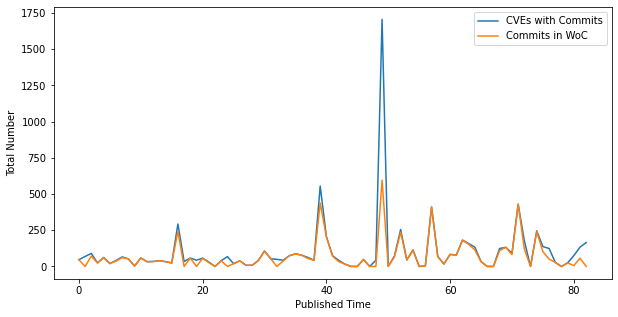

In [71]:
import matplotlib.pyplot as plt

client = pymongo.MongoClient(host="da1.eecs.utk.edu")
db = client['fdac23mp3']
sorted_coll = sorted(db.list_collection_names(), reverse=True)

num_commits = []
num_woc_commits = []

for collection in sorted_coll:
    coll = db[collection]
    commits = 0 
    woc_commits = 0
    
    for entry in coll.find():
        if 'commit' in entry and entry['commit']:
            commits += 1
            if 'inWoC' in entry and entry['inWoC']:
                woc_commits += 1
    
    num_commits.append(commits)
    num_woc_commits.append(woc_commits)

    
plt.figure(figsize=(10, 5))
plt.plot(num_commits, label="CVEs with Commits")
plt.plot(num_woc_commits, label="Commits in WoC")
plt.xlabel("Published Time")
plt.ylabel("Total Number")
plt.legend()
plt.show()

The number of CVEs with commits and commits in WoC go up and down constantly. There is no clear trend and only sudden spikes.

# Part III: Summarize results from MP4 for your assigned language (For your convenience, file LN4.md here provides the map between user id and language in MP4. Please use all collections corresponding to your MP5 language)

## T7 - How many PRs did you count? How many had lineFix: true, how many had moreChanges: true?

In [87]:
import pymongo

client = pymongo.MongoClient(host="da1.eecs.utk.edu")
db = client['fdac23mp4']

num_prs = 0
num_linefix = 0
num_morechanges = 0

for netid in ["bmarth", "jking148", "rrosenb4"]:
    coll = db[netid]

    for entry in coll.find({'language': 'Cobol'}):
        num_prs += 1
        if entry.get('lineFix', False) is True:
            num_linefix += 1
        if entry.get('moreChanges', False) is True:
            num_morechanges += 1

print(f"Number of PRs: {num_prs}")
print(f"PRs with lineFix true: {num_linefix}")
print(f"PRs with moreChanges true: {num_morechanges}")

Number of PRs: 12
PRs with lineFix true: 0
PRs with moreChanges true: 0


There are 12 PRs. 0 had linefix: true and 0 had moreChanges: true.